In [5]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyproj import Transformer
import plotly.graph_objects as go

In [6]:
api_data = pd.read_csv('apidata_2021.csv')

In [7]:
api_data = api_data.drop(columns=['Unnamed: 0'])
api_data['datetime'] = pd.to_datetime(api_data['datetime'])
api_data = api_data.groupby([api_data['datetime'].dt.date, api_data['station_id']])[['Windsnelheid (km/h)', 'Windrichting (Graden)', 'Luchtdruk (ps)', 'Zichtbaarheid (Decimeter ver kunnen kijken)', 'Regenval (mm/h)', 'Temperatuur (C)',	'Weercode']].mean().reset_index()
api_data['station_id'] = api_data['station_id'].astype(str)

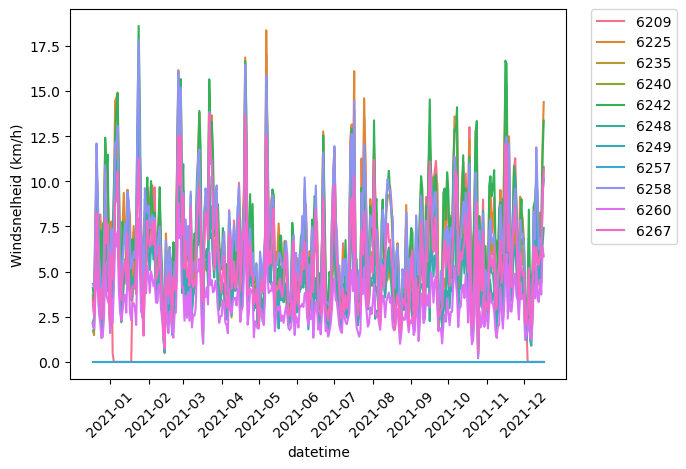

In [8]:
fig = plt.figure()
ax = sns.lineplot(data=api_data, x='datetime', y='Windsnelheid (km/h)', hue='station_id')
ax.set_xticks(['2021-01-15', '2021-02-15', '2021-03-15', '2021-04-15', '2021-05-15','2021-06-15',
               '2021-07-15', '2021-08-15','2021-09-15', '2021-10-15','2021-11-15', '2021-12-15'])
ax.set_xticklabels(['2021-01', '2021-02', '2021-03', '2021-04', '2021-05','2021-06',
               '2021-07', '2021-08','2021-09', '2021-10','2021-11', '2021-12'])
ax.tick_params(axis='x', rotation=45)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)


<Axes: ylabel='Windsnelheid (km/h)'>

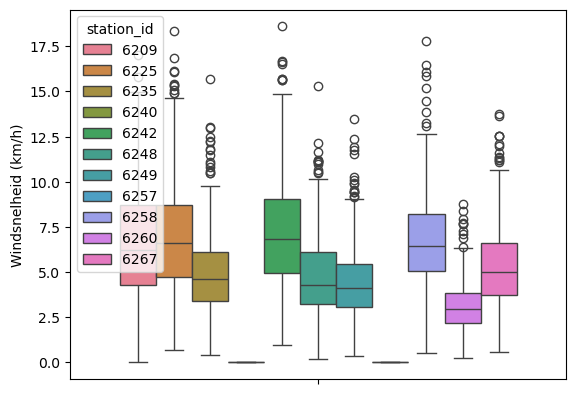

In [12]:
sns.boxplot(data=api_data, y='Windsnelheid (km/h)', hue='station_id')

<Axes: xlabel='Windsnelheid (km/h)', ylabel='Count'>

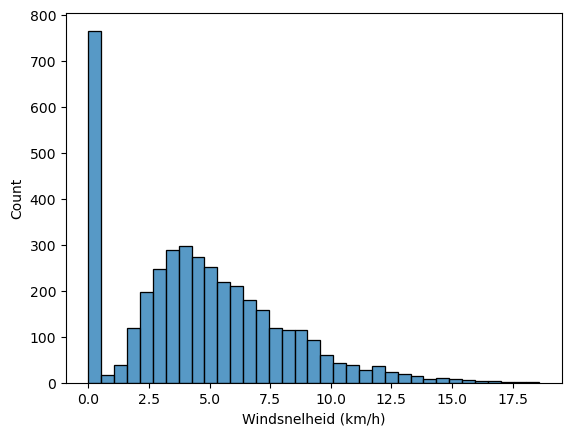

In [13]:
sns.histplot(data=api_data, x='Windsnelheid (km/h)')